## Statiscal Inference

In [1]:
import pandas as pd
import numpy as np
import scipy, scipy.stats
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

### 1. Confidence Interval (skipped)

### 2. Maxium Likelihood Estimation (MLE) 

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of a statistical model given observations, by finding the parameter values that maximize the likelihood of making the observations given the parameters. 

Suppose there is a sample $x_1, x_2, …, x_n$ of $n$ independent and identically distributed observations,(note:$x_s$ here are the observed data) coming from a distribution with an unknown probability density function f0(·). It is however surmised that the function f0 belongs to a certain family of distributions $f(·| θ), θ ∈ Θ$ (where θ is a vector of parameters for this family), called the parametric model, so that f0 = f(·| θ). The value θ is unknown and is referred to as the true value of the parameter vector. It is desirable to find an estimator $\hat {\theta }$ which would be as close to the true value θ as possible. Either or both the observed variables $x_i$ and the parameter θ can be vectors.

#### Define likelihood function:
-  For an independent and identically distributed sample, this joint density function is:

$$f(x_{1},x_{2},\ldots ,x_{n}\mid \theta )=f(x_{1}\mid \theta )\times f(x_{2}|\theta )\times \cdots \times f(x_{n}\mid \theta ).$$

- Now we look at this function from a different perspective by considering the observed values x1, x2, …, xn to be fixed "parameters" of this function, whereas θ will be the function's variable and allowed to vary freely; this function will be called the likelihood:
$$\mathcal {L}(\theta \,|\,x_{1},\ldots ,x_{n})=f(x_{1},x_{2},\ldots ,x_{n}\mid \theta )=\prod _{i=1}^{n}f(x_{i}\mid \theta ).$$

- In practice it is often more convenient to work with the natural logarithm of the likelihood function, called the log-likelihood:
$$\ln {\mathcal {L}}(\theta \,|\,x_{1},\ldots ,x_{n})=\sum _{i=1}^{n}\ln f(x_{i}\mid \theta )$$

- Maxium Likelihood Estimation is to find $\theta$ which maxium the likelihood function. In other words, find $\theta$ that make our observed data mostly likely to be observed. 
$$\hat {\theta}_{MLE} = argmax\ln {\mathcal {L}}(\theta \,|\,x_{1},\ldots ,x_{n}) $$

#### Calculating MLE
- One way of calculating MLE is to take the deravitive of the log likelihood function and set that to 0, than find out $\theta$.
- In real world, people also use approximation method to get MLE
##### I will skip the function derivation here, instead, i will just use scipy to calculate MLE

In [29]:
## example: a random draw from unifrom distribution, 
## than use the data to extimate the premator for the true data generation process

a,b = 0,5                                    # set lower bond and upper bound to be 0 and 5 
u_data = scipy.stats.uniform.rvs(a,b,1000)   # random draw from uniform distribution 
a_hat, b_hat = scipy.stats.uniform.fit(u_data)              # use fit method to extimate the peremators

print ('Predicted a and b are:%.2f;%.2f'% (a_hat,b_hat))

Predicted a and b are:0.01;4.99


- ##### Sample question: Suppose we observe $n = 5$ in dependent draws from a $Uniform(0,\theta)$. They are {0.2,4.6,3.3,4.1,5.2}. What is the MLE for $\theta$. 

In [43]:
data = [0.2,4.6,3.3,4.1,5.2]
a_hat,b_hat = scipy.stats.uniform.fit(data,floc=0)        # use floc and fscale to impose constrains
print ('Predicted a and b are:%.2f;%.2f'% (a_hat,b_hat))

Predicted a and b are:0.00;5.20


### 3. Bayesian Inference

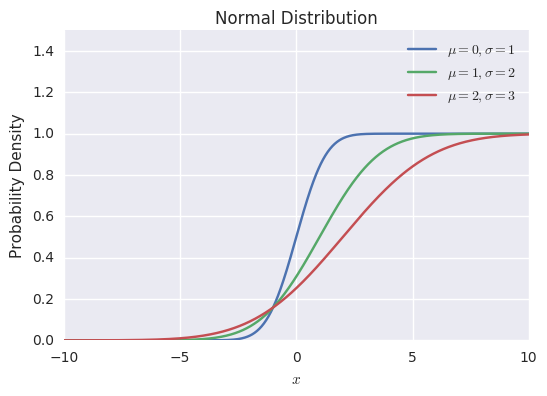

In [5]:
# Plot a normal distribution
mean_list = [0,1,2]
sigma_list = [1,2,3]
# Plot between -10 and 10 with .001 steps.
x = np.linspace(-10, 10, 1000)

for mean,sigma in zip(mean_list,sigma_list):
    plt.plot(x, scipy.stats.norm.cdf(x, mean, sigma),label='$\mu=%.0f,\sigma=%.0f$' % (mean,sigma))

plt.ylim(0, 1.5)
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.legend()
plt.show()